In [ ]:
%matplotlib inline
from PIL import Image
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os
import nltk, string
import matplotlib.pyplot as plt
nltk.download('punkt') 

In [32]:
folder_path = 'C:/Users/andil/Documents/01 Career/02 Standard Bank AI Specialist Case Study/multi-modal-retrieval/src/data/images'
images = []

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')): 
        img_path = os.path.join(folder_path, filename) 
        img = Image.open(img_path)
        images.append(img)

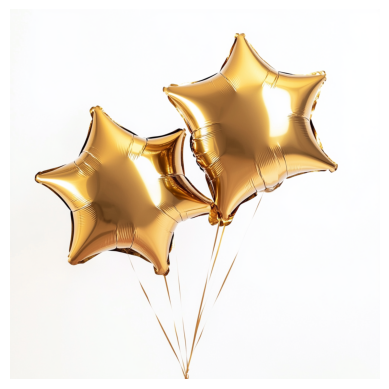

In [33]:
if images:
    plt.imshow(images[0])
    plt.axis('off')  
    plt.show()
else:
    print("No images found in the list.")

In [34]:
resnet = ResNet50(weights='imagenet')

255.0 0.0
151.061 -123.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[[('n03160309', 'dam', 0.92945427),
  ('n09468604', 'valley', 0.050789107),
  ('n03388043', 'fountain', 0.019235723),
  ('n09246464', 'cliff', 0.0003136624),
  ('n09288635', 'geyser', 7.127079e-05),
  ('n09332890', 'lakeside', 5.6810222e-05),
  ('n09472597', 'volcano', 2.8944765e-05),
  ('n02894605', 'breakwater', 2.0352758e-05),
  ('n09428293', 'seashore', 9.183783e-06),
  ('n09399592', 'promontory', 6.5913796e-06)]]

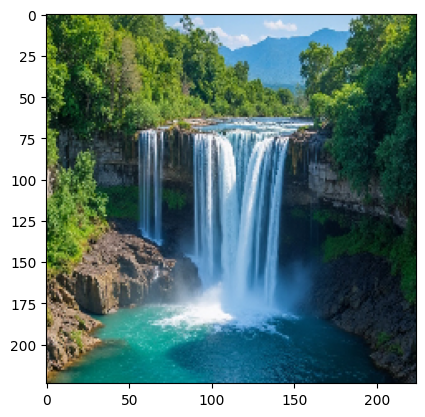

In [35]:

img = image.load_img('C:/Users/andil/Documents/01 Career/02 Standard Bank AI Specialist Case Study/multi-modal-retrieval/src/data/images/45b4cbc319774aecaa5e03bec98b2f96.jpg', target_size=(224, 224))
img = image.img_to_array(img)
print(img.max(),img.min())
plt.imshow(img / 255.)
x = np.expand_dims(img.copy(), axis=0)
x = preprocess_input(x)
print(x.max(),x.min())
preds = resnet.predict(x)
decode_predictions(preds, top=10)

255.0 0.0
151.061 -123.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


[[('n04548280', 'wall_clock', 0.7544773),
  ('n02708093', 'analog_clock', 0.22855328),
  ('n03706229', 'magnetic_compass', 0.0072845863),
  ('n02825657', 'bell_cote', 0.0041440586),
  ('n04355338', 'sundial', 0.0031862722),
  ('n02794156', 'barometer', 0.0015260909),
  ('n04328186', 'stopwatch', 0.000548845),
  ('n04435653', 'tile_roof', 3.739627e-05),
  ('n03196217', 'digital_clock', 3.3694432e-05),
  ('n03028079', 'church', 2.0272462e-05)]]

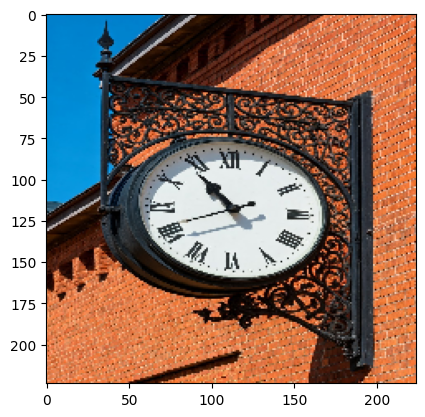

In [10]:
img = image.load_img('C:/Users/andil/Documents/01 Career/02 Standard Bank AI Specialist Case Study/multi-modal-retrieval/src/data/images/46be149a87ab487686b56b78f2f90d02.jpg', target_size=(224, 224))
img = image.img_to_array(img)
print(img.max(),img.min())
plt.imshow(img / 255.)
x = np.expand_dims(img.copy(), axis=0)
x = preprocess_input(x)
print(x.max(),x.min())
preds = resnet.predict(x)
decode_predictions(preds, top=10)

255.0 0.0
151.061 -116.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


[[('n02948072', 'candle', 0.20265532),
  ('n03992509', "potter's_wheel", 0.20249015),
  ('n03786901', 'mortar', 0.050749373),
  ('n10148035', 'groom', 0.04751861),
  ('n04201297', 'shoji', 0.045255914),
  ('n03840681', 'ocarina', 0.042187694),
  ('n04590129', 'window_shade', 0.040272065),
  ('n04081281', 'restaurant', 0.040183444),
  ('n03201208', 'dining_table', 0.03060183),
  ('n03633091', 'ladle', 0.027224736)]]

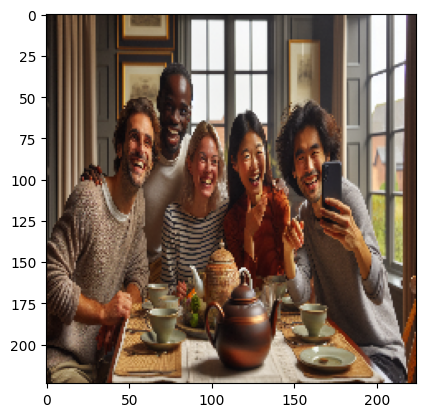

In [20]:
img = image.load_img('C:/Users/andil/Documents/01 Career/02 Standard Bank AI Specialist Case Study/multi-modal-retrieval/src/data/images/49cfed0126d94e2c9086ce385eea602e.jpg', target_size=(224, 224))
img = image.img_to_array(img)
print(img.max(),img.min())
plt.imshow(img / 255.)
x = np.expand_dims(img.copy(), axis=0)
x = preprocess_input(x)
print(x.max(),x.min())
preds = resnet.predict(x)
decode_predictions(preds, top=10)

255.0 0.0
151.061 -123.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


[[('n03991062', 'pot', 0.3795151),
  ('n02699494', 'altar', 0.10555722),
  ('n03201208', 'dining_table', 0.10466967),
  ('n02948072', 'candle', 0.07469262),
  ('n04476259', 'tray', 0.04830615),
  ('n04081281', 'restaurant', 0.03665159),
  ('n04596742', 'wok', 0.026173007),
  ('n04367480', 'swab', 0.018749638),
  ('n03461385', 'grocery_store', 0.015087727),
  ('n03223299', 'doormat', 0.015009756)]]

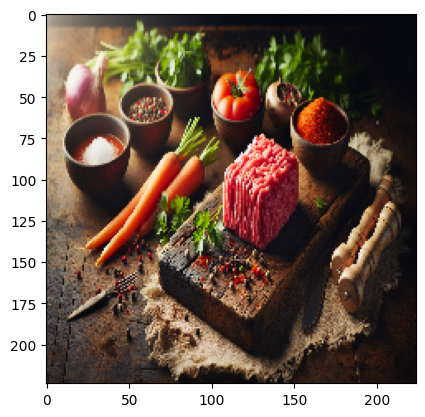

In [13]:
img = image.load_img('C:/Users/andil/Documents/01 Career/02 Standard Bank AI Specialist Case Study/multi-modal-retrieval/src/data/images/050bc88938bd4e739d075269fb2da9b4.jpg', target_size=(224, 224))
img = image.img_to_array(img)
print(img.max(),img.min())
plt.imshow(img / 255.)
x = np.expand_dims(img.copy(), axis=0)
x = preprocess_input(x)
print(x.max(),x.min())
preds = resnet.predict(x)
decode_predictions(preds, top=10)

255.0 0.0
150.061 -123.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


[[('n04479046', 'trench_coat', 0.1987274),
  ('n04584207', 'wig', 0.16051221),
  ('n03630383', 'lab_coat', 0.13456166),
  ('n03045698', 'cloak', 0.09243031),
  ('n02963159', 'cardigan', 0.06302911),
  ('n03594734', 'jean', 0.04724454),
  ('n04325704', 'stole', 0.03820682),
  ('n04599235', 'wool', 0.029247953),
  ('n03770439', 'miniskirt', 0.021938778),
  ('n04350905', 'suit', 0.011686269),
  ('n04370456', 'sweatshirt', 0.0115064345),
  ('n02869837', 'bonnet', 0.0100612175),
  ('n03866082', 'overskirt', 0.008652352),
  ('n04317175', 'stethoscope', 0.008160825),
  ('n04532106', 'vestment', 0.0077291075)]]

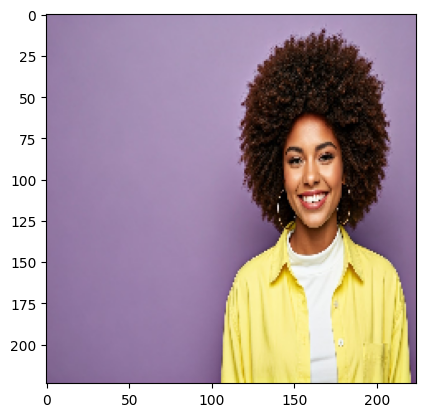

In [14]:
img = image.load_img('C:/Users/andil/Documents/01 Career/02 Standard Bank AI Specialist Case Study/multi-modal-retrieval/src/data/images/53b81ccb8a1340d180727c56e2a2bcd3.jpg', target_size=(224, 224))
img = image.img_to_array(img)
print(img.max(),img.min())
plt.imshow(img / 255.)
x = np.expand_dims(img.copy(), axis=0)
x = preprocess_input(x)
print(x.max(),x.min())
preds = resnet.predict(x)
decode_predictions(preds, top=15)

In [ ]:
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]

print(cosine_sim('a time piece', 'a time piece'))
print(cosine_sim('a time piece', 'analog_clock magnetic_compass bell_cote sundial barometer stopwatch tile_roof digital_clock church'))
print(cosine_sim('a time piece', 'altar dining_table candle tray restaurant wok swab grocery_store doormat'))
print(cosine_sim('a time piece', 'trench_coat wig lab_coat cloak cardigan jean stole wool miniskirt suit sweatshirt bonnet overskirt stethoscope vestment'))

0.0
0.0
1.0000000000000002
0.0


In [41]:
from sentence_transformers import SentenceTransformer, util

# Load the pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def semantic_similarity(text1, text2):
    # Encode the sentences
    embeddings1 = model.encode(text1, convert_to_tensor=True)
    embeddings2 = model.encode(text2, convert_to_tensor=True)
    # Compute the cosine similarity
    similarity = util.pytorch_cos_sim(embeddings1, embeddings2)
    return similarity.item()

print(cosine_sim('a time piece', 'a time piece'))
print(semantic_similarity('a time piece', 'analog_clock magnetic_compass bell_cote sundial barometer stopwatch tile_roof digital_clock church'))
print(semantic_similarity('a time piece', 'altar dining_table candle tray restaurant wok swab grocery_store doormat'))
print(semantic_similarity('a time piece', 'trench_coat wig lab_coat cloak cardigan jean stole wool miniskirt suit sweatshirt bonnet overskirt stethoscope vestment'))


1.0000000000000002
0.2616601586341858
0.18517887592315674
0.08883851766586304
